# Optical Character Recognition of Arabic Characters

Classifiying Arabic characters. For more details please visit [this link](https://www.kaggle.com/mloey1/ahdd1)

### Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Loading training dataset

In [16]:
# load training data
x_train = pd.read_csv('csvTrainImages 13440x1024.csv')
print("Training images")
x_train.head()

# load training labels
y_train = pd.read_csv('csvTrainLabel 13440x1.csv')
print("Training labels")
y_train.head()

# convert x_train dataframe to numpy ndarray and transpose each image using swapaxes.
x_train = x_train.values.reshape([-1,32,32]).swapaxes(1,2)

# convert y_train dataframe to numpy ndarray and remove all extra dimensions.
y_train = y_train.values.squeeze()

Training images
Training labels


### Loading test dataset

In [17]:
valid_test_split = 0.5

# load test data
x_test = pd.read_csv('csvTestImages 3360x1024.csv')
x_test.head()
x_test = x_test.values.reshape([-1,32,32]).swapaxes(1,2)

# load test labels
y_test = pd.read_csv('csvTestLabel 3360x1.csv')
y_test.head()
y_test = y_test.values.squeeze()

### Creating validation and test splits of the test set

In [18]:
m_test = y_test.shape[0]
x_val = x_test[ : int(m_test * valid_test_split) ]
x_test = x_test[ int(m_test * valid_test_split) : ]

y_val = y_test[ : int(m_test * valid_test_split) ]
y_test = y_test[ int(m_test * valid_test_split) : ]

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


x_train shape: (13439, 32, 32)
x_val shape: (1679, 32, 32)
x_test shape: (1680, 32, 32)
y_train shape: (13439,)
y_val shape: (1679,)
y_test shape: (1680,)


### Plotting random samples of the training set

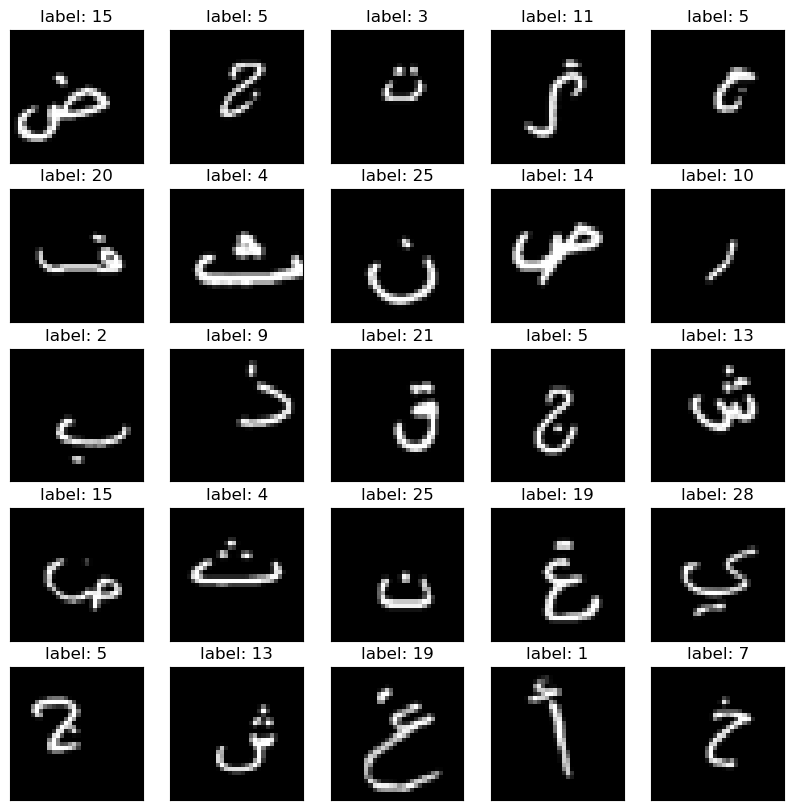

In [19]:
fig = plt.figure(0, figsize=(10,10))
indices = np.random.randint(0, y_train.shape[0], size=25)


for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title("label: {}".format(y_train[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Preprcoessing

In [20]:
# scaling features to range [0,1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [21]:
# change the dimensions of each image to 32x32x1
x_train = x_train[:,:,:,np.newaxis]
print(x_train.shape)
x_val = x_val[:,:,:,np.newaxis]
print(x_val.shape)
x_test = x_test[:,:,:,np.newaxis]
print(x_test.shape)

(13439, 32, 32, 1)
(1679, 32, 32, 1)
(1680, 32, 32, 1)


In [22]:
# changing the labels to one-hot encoding format (28 entry all zeros except for one)
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train[:, None]).toarray()
y_val = one_hot.fit_transform(y_val[:, None]).toarray()
y_test = one_hot.fit_transform(y_test[:, None]).toarray()

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(13439, 28)
(1679, 28)
(1680, 28)


### Building the classification model

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout

classifier = Sequential()
classifier.add(Conv2D(16, 5, strides=1, padding='valid', activation='relu', input_shape=[32, 32, 1]))
# classifier.add(BatchNormalization(axis=2))

classifier.add(Conv2D(32, 2, strides=2, padding='valid', activation='relu'))
classifier.add(BatchNormalization(axis=3))

classifier.add(Conv2D(64, 5, strides=1, padding='valid', activation='relu'))
classifier.add(BatchNormalization(axis=3))

classifier.add(Conv2D(128, 2, strides=2, padding='valid', activation='relu'))
classifier.add(BatchNormalization(axis=3))

classifier.add(GlobalAveragePooling2D())

classifier.add(Dropout(rate=0.4))
classifier.add(Dense(128, activation='relu'))
classifier.add(BatchNormalization(axis=1))

classifier.add(Dropout(rate=0.3))
classifier.add(Dense(28, activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         3

### Training the model

In [ ]:
# creating a ModelCheckpoint object to store the best model's parameters
from keras.callbacks import ModelCheckpoint
chkpt = ModelCheckpoint('arabic_ocr_best_weights.md5', verbose=0, save_best_only=True)

# start training
history = classifier.fit(x_train,
                           y_train,
                           batch_size=256,
                           epochs=50,
                           verbose=2,
                           validation_data=(x_val, y_val),
                           callbacks=[chkpt])

Epoch 1/50


INFO:tensorflow:Assets written to: arabic_ocr_best_weights.md5\assets


INFO:tensorflow:Assets written to: arabic_ocr_best_weights.md5\assets


53/53 - 25s - loss: 2.8319 - accuracy: 0.2095 - val_loss: 3.3551 - val_accuracy: 0.0691 - 25s/epoch - 474ms/step
Epoch 2/50
53/53 - 15s - loss: 1.5972 - accuracy: 0.4796 - val_loss: 3.7001 - val_accuracy: 0.0357 - 15s/epoch - 284ms/step
Epoch 3/50
53/53 - 14s - loss: 1.0498 - accuracy: 0.6566 - val_loss: 5.0089 - val_accuracy: 0.0357 - 14s/epoch - 261ms/step
Epoch 4/50
53/53 - 13s - loss: 0.7583 - accuracy: 0.7523 - val_loss: 7.1615 - val_accuracy: 0.0357 - 13s/epoch - 255ms/step
Epoch 5/50
53/53 - 13s - loss: 0.5872 - accuracy: 0.8133 - val_loss: 8.5541 - val_accuracy: 0.0357 - 13s/epoch - 254ms/step
Epoch 6/50
53/53 - 13s - loss: 0.4808 - accuracy: 0.8491 - val_loss: 8.6168 - val_accuracy: 0.0363 - 13s/epoch - 250ms/step
Epoch 7/50
53/53 - 13s - loss: 0.3931 - accuracy: 0.8766 - val_loss: 8.9477 - val_accuracy: 0.0357 - 13s/epoch - 246ms/step
Epoch 8/50
53/53 - 13s - loss: 0.3342 - accuracy: 0.8972 - val_loss: 7.4652 - val_accuracy: 0.0459 - 13s/epoch - 247ms/step
Epoch 9/50
53/53 - 

INFO:tensorflow:Assets written to: arabic_ocr_best_weights.md5\assets


INFO:tensorflow:Assets written to: arabic_ocr_best_weights.md5\assets


53/53 - 20s - loss: 0.1946 - accuracy: 0.9421 - val_loss: 1.7456 - val_accuracy: 0.5485 - 20s/epoch - 382ms/step
Epoch 13/50
53/53 - 16s - loss: 0.1716 - accuracy: 0.9500 - val_loss: 2.3298 - val_accuracy: 0.4580 - 16s/epoch - 295ms/step
Epoch 14/50


In [ ]:
ev = classifier.evaluate(x_test, y_test)
print()
print(classifier.metrics_names[0], ev[0])
print(classifier.metrics_names[1], ev[1])

### Plotting Accuracy VS Epochs

In [ ]:
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

fig = plt.figure(1, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

plt.subplot(2,1,2)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

plt.show()

### Plotting random test samples with their predicted labels and true labels

In [ ]:
fig = plt.figure(0, figsize=(18,18))
indices = np.random.randint(0, y_test.shape[0], size=49)
y_pred = np.argmax(classifier.predict(x_test), axis=1)

for i, idx in enumerate(indices):
    plt.subplot(7,7,i+1)
    plt.imshow(x_test[idx][:,:,0], cmap='gray')
    plt.title("Pred: {} - Label: {}".format(y_pred[idx], np.argmax(y_test[idx])))
    plt.xticks([])
    plt.yticks([])
plt.show()